In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
dw = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [5]:
dw.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


# 1
Find out how flight delays are related to the time of year

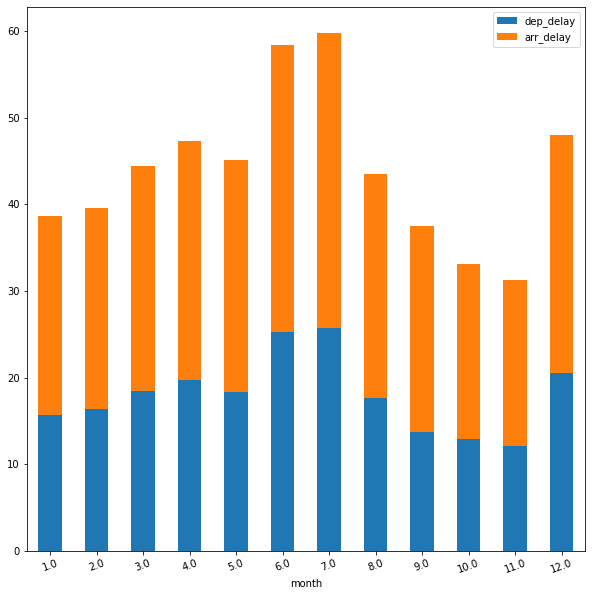

In [6]:
f1 = df.dropna(subset=['dep_delay', 'arr_delay'])
f1 = f1[['month', 'dep_delay', 'arr_delay']].abs()
f1 = f1.groupby('month')['dep_delay', 'arr_delay'].mean()

f1.plot.bar(rot = 20, stacked=True, figsize = (10, 10))
plt.show()  

We see that the biggest problems are in the summer months and december

# 3, 4
Compare delays during the day

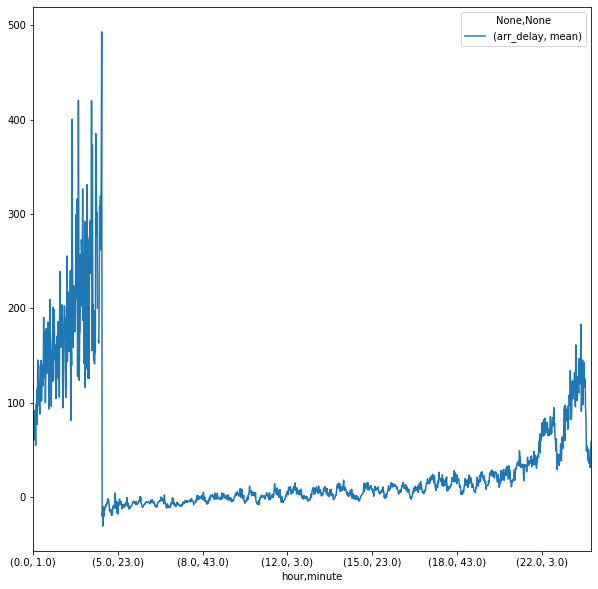

In [7]:
f3 = df.dropna(subset=['arr_delay'])
f3['arr_delay'].abs()
f3 = df.groupby(['hour', 'minute']).agg({'arr_delay': ['mean']})
f3.plot(figsize = (10, 10))
plt.show()

Find out what does happen before 5.
Average air time and frequency of flights - more time or requency means less predictable arrival times

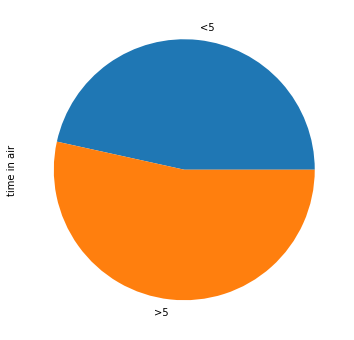

131.66092350103378

In [32]:
before5=df.loc[(df['hour']<=5)]
before5=before5[['air_time']].mean()

after5=df.loc[(df['hour']>5)]
after5=after5[['air_time']].mean()

#after5[0]
#print(type(after5[0]))
series = pd.Series([before5[0], after5[0]], index=['<5', '>5'], name='time in air')
series.plot.pie(figsize=(6, 6))
plt.show()

<class 'pandas.core.series.Series'>


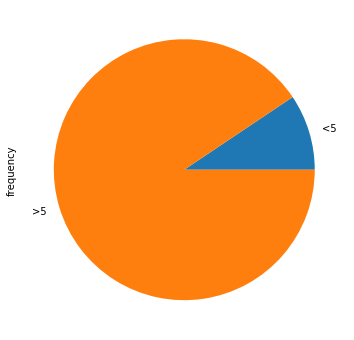

In [28]:
before5=df.loc[(df['hour']<=5)].shape[0]
after5=df.loc[(df['hour']>5)].shape[0]

series = pd.Series([before5/5, after5/19], index=['<5', '>5'], name='frequency')
series.plot.pie(figsize=(6, 6))
plt.show()

These stuff don't affect on delays. Such errors until 5 a.m.could be caused by the airport

# 5, 6
Competition: which is the worst carrier
We have two tasks. First, which carrier is the most reliable and not reliable on average. 
Second, how bad the data showed carriers

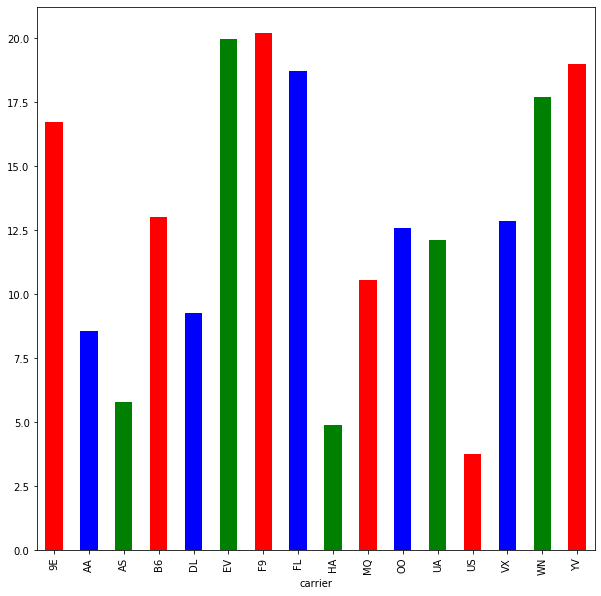

,"(dep_delay, mean)",difference
carrier,,
9E,16.725769,771.0
AA,8.586016,1038.0
AS,5.804775,246.0
B6,13.022522,545.0
DL,9.264505,993.0
EV,19.955390,580.0
F9,20.215543,880.0
FL,18.726075,624.0
HA,4.900585,1317.0


In [10]:
f2 = df.dropna(subset = ['dep_delay'])
f2 = f2.groupby(['carrier']).agg({'dep_delay': [min, max, 'mean']})
ff = (abs(f2[max] - f2[min])).to_frame().reset_index()
ff = ff.rename(columns= {0: 'difference'})
ff = ff.groupby('carrier').first()
f2 = pd.concat([f2, ff], axis = 1)

f2 = f2.drop(('dep_delay', 'min'), 1)
f2 = f2.drop(('dep_delay', 'max'), 1)

f2[('dep_delay', 'mean')].plot.bar(figsize=(10, 10), color = ('r', 'b', 'g', 'r', 'b', 'g', 'r', 'b', 'g'))
plt.show()
f2.head(20)

(dep_delay, mean)       4.900585
difference           1317.000000
Name: HA, dtype: float64 

(dep_delay, mean)     12.586207
difference           168.000000
Name: OO, dtype: float64


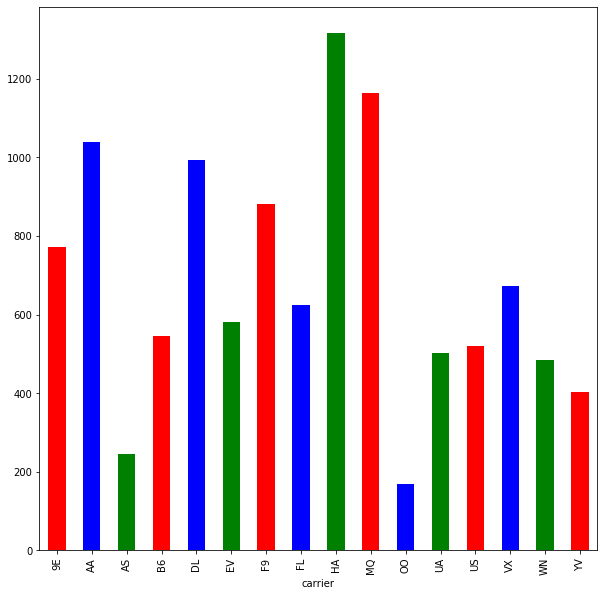

In [11]:
print(f2.loc[f2['difference'].idxmax()], '\n')
print(f2.loc[f2['difference'].idxmin()])

f2['difference'].plot.bar(figsize=(10, 10), color = ('r', 'b', 'g', 'r', 'b', 'g', 'r', 'b', 'g'))
plt.show()

US has the lowest delay on average and F9 has the highest delay on average
But max delay of HA is longer than others and max delay of OO is shorter than others

# 7
How are delays and weather connected?

In [12]:
fw = df.groupby(['month','day', 'hour'])['dep_delay'].mean()
ww = dw.groupby(['month','day', 'hour'])['wind_speed'].mean()
fw = pd.merge(fw, ww, on = ['month', 'day', 'hour'])
#type(fw.first())
fw

dep_delay  wind_speed
month day hour                        
1     1   6.0    -1.156863    10.35702
          7.0     1.378378     8.05546
          8.0    14.109375    11.50780
          9.0     6.019231    12.65858
          10.0    0.512821    12.65858
          11.0    4.977778    11.50780
          12.0    2.139535    14.96014
          13.0    9.170213    10.35702
          14.0    4.320000    14.96014
          15.0   12.371429    13.80936
          16.0   12.225806    14.96014
          17.0   12.228070    16.11092
          18.0   19.688525    14.96014
          19.0   20.553191    13.80936
          20.0   20.220000     9.20624
          21.0   23.173913    13.80936
          22.0   51.727273    11.50780
          23.0   76.000000    12.65858
      2   0.0    43.000000    10.35702
          1.0   156.000000    14.96014
          4.0    -2.000000    16.11092
          5.0    -3.705882    14.96014
          6.0     1.250000    12.65858
          7.0     5.377049    13.80936
          8.0     6.693333    14.96014
          9.0    14.607843    12.65858
          10.0    8.122449     6.90468
          11.0    4.069767     3.45234
          12.0   10.211538     6.90468
          13.0   17.181818     9.20624
...                    ...         ...
12    29  16.0   24.660377     3.45234
          17.0   19.976190     3.45234
          18.0   38.538462     8.05546
          19.0   38.937500     8.05546
          20.0   57.040000    10.35702
          21.0   68.692308     9.20624
          22.0   90.354839    14.96014
          23.0   66.133333    16.11092
      30  0.0    43.000000    14.96014
          1.0   210.000000    14.96014
          4.0    -6.000000    13.80936
          5.0    -3.000000     5.75390
          6.0    -1.451613     6.90468
          7.0     3.388889     8.05546
          8.0     4.355263     4.60312
          9.0    13.707692     8.05546
          10.0    2.780000     8.05546
          11.0    4.000000     8.05546
          12.0    7.450000     8.05546
          13.0    8.960784    10.35702
          14.0    6.924528    10.35702
          15.0   15.160000    13.80936
          16.0   16.803279    14.96014
          17.0   12.805970    13.80936
          18.0   10.720588    19.56326
          19.0   10.529412    17.26170
          20.0    8.209302    17.26170
          21.0   29.250000    14.96014
          22.0   55.466667    16.11092
          23.0   66.625000    14.96014

[7586 rows x 2 columns]

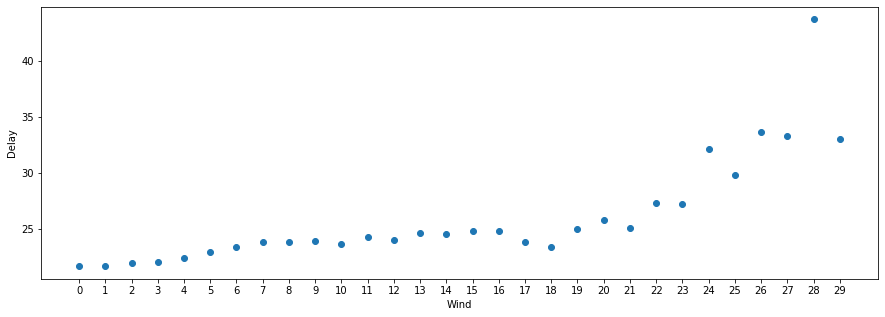

In [13]:
fw = fw.sort_values(by=['wind_speed'], ascending=False)
fw = fw.dropna(subset = ['wind_speed', 'dep_delay'])
fw = fw.abs()
a = []
b = []
for i in range (30):
    a.append(fw.loc[((fw['wind_speed']<i+10) & (fw['wind_speed'] > i))].mean()[0])
    b.append(str(i))
    
plt.figure(figsize=(15, 5))
plt.scatter(b, a)
plt.ylabel('Delay')
plt.xlabel('Wind')
plt.show()

#fw['dep_delay'].plot(figsize=(100, 10))

Stronger wind - longer delay

# 8, 9
Is visib connected with humid or wind?

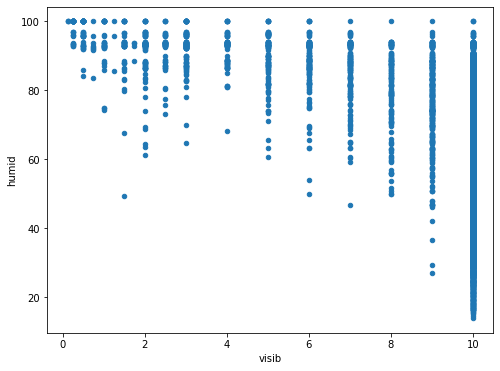

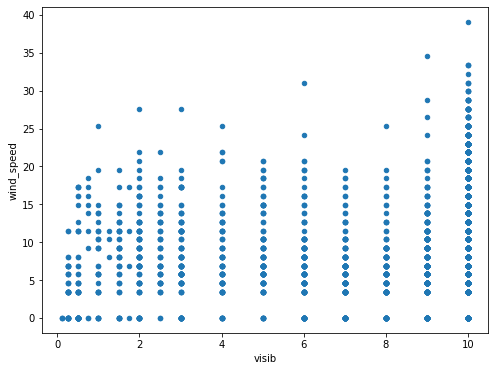

In [14]:
#fv = dw.groupby('visib')['humid']
dw.plot.scatter(x = 'visib', y = 'humid', figsize=(8, 6))
plt.show()

fv = dw.loc[(dw['wind_speed'] < 40)]
fv.plot.scatter(x = 'visib', y = 'wind_speed', figsize=(8, 6))
plt.show()

Higher humid - lower visibility. Also we can notice with strong winds always good visibility

# 10
How much delays were in particular origin?

numpy.float64

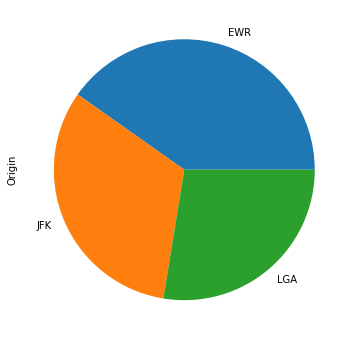

In [68]:
f10 = df.dropna(subset=['dep_delay', 'arr_delay'])
origin = f10.groupby('origin')['dep_delay'].mean().reset_index(name='delay')
series = pd.Series([origin['delay'][0], origin['delay'][1], origin['delay'][2]], 
                    index=[origin['origin'][0], origin['origin'][1], origin['origin'][2]], name='Origin')
series.plot.pie(figsize=(6, 6))
type(origin['delay'][0])